# LAB 4. Logistic Regression & Regularization

![](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

With 9 explanatory features, you have to analyze what sorts of people were likely to survive.

Description of the fields ([see in detail](https://www.kaggle.com/c/titanic/data)):
+ **survival** -- Survival: 0 = No, 1 = Yes
+ **pclass** -- Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
+ **sex** -- Sex
+ **Age** -- Age in years
+ **sibsp** -- # of siblings / spouses aboard the Titanic
+ **parch** -- # of parents / children aboard the Titanic
+ **ticket** -- Ticket number
+ **fare** -- Passenger fare
+ **cabin** -- Cabin number
+ **embarked** -- Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton


## Outline
Click on these links to jump to a particular section of this assignment.
- [1. Data exploration and visualization](#1)
    - [1.1. Load data and study missing values](#1-1)
    - [1.2. Let's take a closer look at some features](#1-2)
    - [1.3. Transform the data](#1-3)
- [2. Logistic regression model](#2)
    - [2.1. Sklearn-based LogisticRegression model implementation](#2-1)
    - [2.2. Logistic regression from scratch](#2-2)
- [3. YOUR TURN](#3)
    - [3.1. Try to get a test accuracy of at least 0.780 using the minimum number of features](#3-1)
    - [3.2. Regularization](#3-2)


## References
- [Titanic: Machine Learning from Disaster (Kaggle Challenge)](https://www.kaggle.com/c/titanic)
- [Practical Reinforcement Learning. Week 1](https://www.coursera.org/learn/practical-rl/)
- [Titanic: Logistic Regression with Python](https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python)
- [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Logistic Regression from scratch in Python](https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac)

<a name="1"></a>
## 1. Data exploration and visualization

<a name="1-1"></a>
### 1.1. Load data and study missing values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/data


/content/drive/MyDrive/data


In [ ]:
ls

house_prices_train_data.csv  titanic_test_data.csv  titanic_train_data.csv


In [ ]:
# Load useful libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train = pd.read_csv('titanic_train_data.csv')
test = pd.read_csv('titanic_test_data.csv')

dataset = [train, test]

print("Shape of the train dataframe =", train.shape)
print("Shape of the test dataframe =", test.shape)

train.head()

Shape of the train dataframe = (891, 12)
Shape of the test dataframe = (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Display statistical aggregates for each column
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


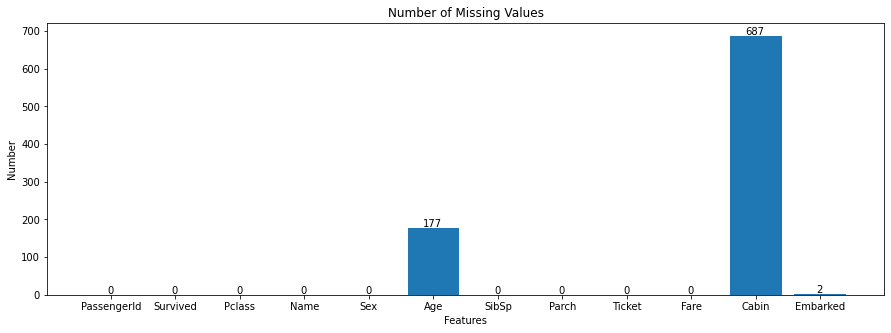

In [ ]:
# Check missing values in train data
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(list(train), train.isnull().sum())
ax.set(title="Number of Missing Values", xlabel="Features", ylabel="Number")

# Add the values above the bars
for index, value in enumerate(train.isnull().sum()):
    ax.text(index - len(str(value))*0.055, value + 3, str(value))
    
plt.show()

In [ ]:
# Or you can use just the following :-)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

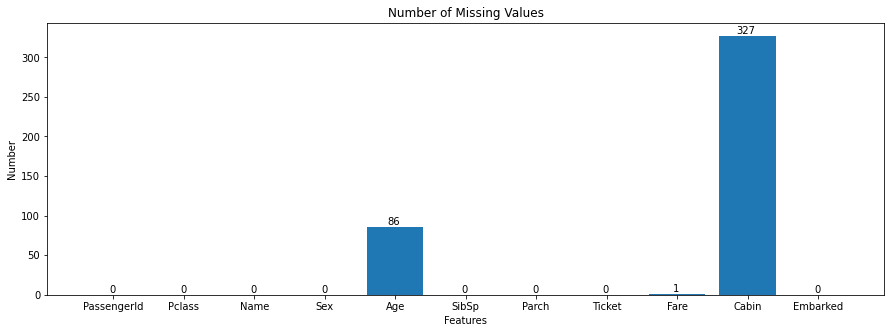

In [ ]:
# Check missing values in train data
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(list(test), test.isnull().sum())
ax.set(title="Number of Missing Values", xlabel="Features", ylabel="Number")

# Add the values above the bars
for index, value in enumerate(test.isnull().sum()):
    ax.text(index - len(str(value))*0.055, value + 3, str(value))
    
plt.show()

<a name="1-2"></a>
### 1.2. Let's take a closer look at some features

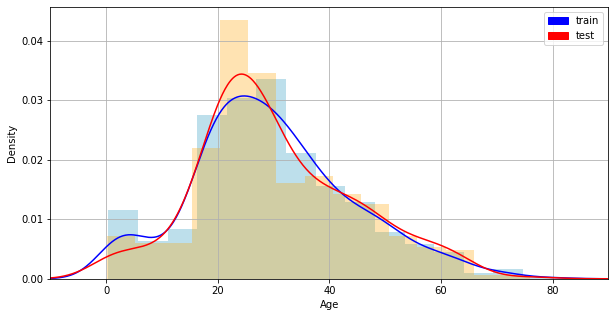

In [ ]:
# Let's see the distribution of the Age values in the training set
import matplotlib.patches as mpatches
plt.figure(figsize=(10,5))

train["Age"].hist(bins=15, density=True, color="lightblue", stacked=True, alpha=0.8)
test["Age"].hist(bins=15, density=True, color="orange", stacked=True, alpha=0.3)

train["Age"].plot(kind='density', color='blue')
test["Age"].plot(kind='density', color='red')

# Add legend
blue_patch = mpatches.Patch(color='blue', label='train')
red_patch = mpatches.Patch(color='red', label='test')
plt.legend(handles=[blue_patch, red_patch])

plt.xlabel("Age")
plt.xlim((-10, 90))
plt.grid()

plt.show()

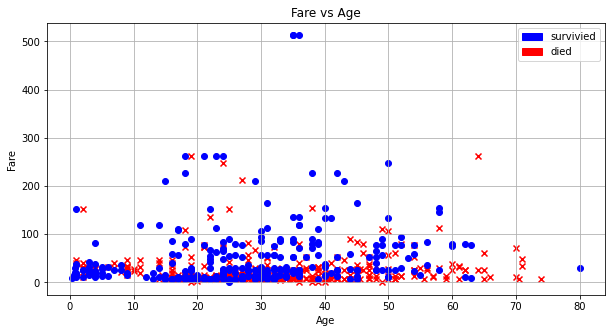

In [ ]:
# Let's see the Fare vs Age points labeled by Survived feature in the training set
plt.figure(figsize=(10,5))

plt.scatter(train["Age"][train["Survived"] == 0], train["Fare"][train["Survived"] == 0], c="red", marker="x")
plt.scatter(train["Age"][train["Survived"] == 1], train["Fare"][train["Survived"] == 1], c="blue", marker="o")

plt.grid()

blue_patch = mpatches.Patch(color='blue', label='survivied')
red_patch = mpatches.Patch(color='red', label='died')
plt.legend(handles=[blue_patch, red_patch])

plt.title("Fare vs Age")
plt.xlabel("Age")
plt.ylabel("Fare")

plt.show()

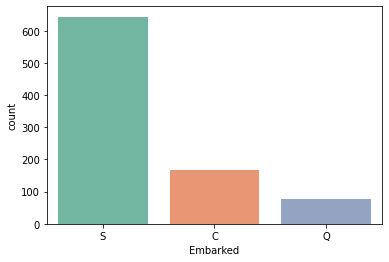

where C = Cherbourg, Q = Queenstown, S = Southampton.


In [ ]:
# And let's see Embarked values that are port of embarkation
ax = sns.countplot(x='Embarked', data=train, palette='Set2')
plt.show()
print('where C = Cherbourg, Q = Queenstown, S = Southampton.')

<a name="1-3"></a>
### 1.3. Transform the data

In [ ]:
for data in dataset:
    # Fill missing values of Age and Fare with median values
    data['Age'] = data['Age'].fillna(value=data['Age'].median())
    data['Fare'] = data['Fare'].fillna(value=data['Fare'].median())
    data["Embarked"] = data["Embarked"].fillna(value="S")   # because "S" is the most common port of embarkation    
    
    # Replace string values by numbers
    data["Sex"] = data["Sex"].map({"male": 1, "female": 0}).astype(int)    
    data["Embarked"] = data["Embarked"].map({"S": 1, "C": 2, "Q": 3}).astype(int)    
    
    # Create a new feature
    data["FamilySize"] = data["Parch"] + data["SibSp"]       

    
# Check missing Age and Fare values
print("Missing values:")
print("  Train: Age - {}, Fare - {}".format(train.Age.isnull().sum(), train.Fare.isnull().sum()))
print("  Test : Age - {}, Fare - {}".format(test.Age.isnull().sum(), test.Fare.isnull().sum()))

Missing values:
  Train: Age - 0, Fare - 0
  Test : Age - 0, Fare - 0


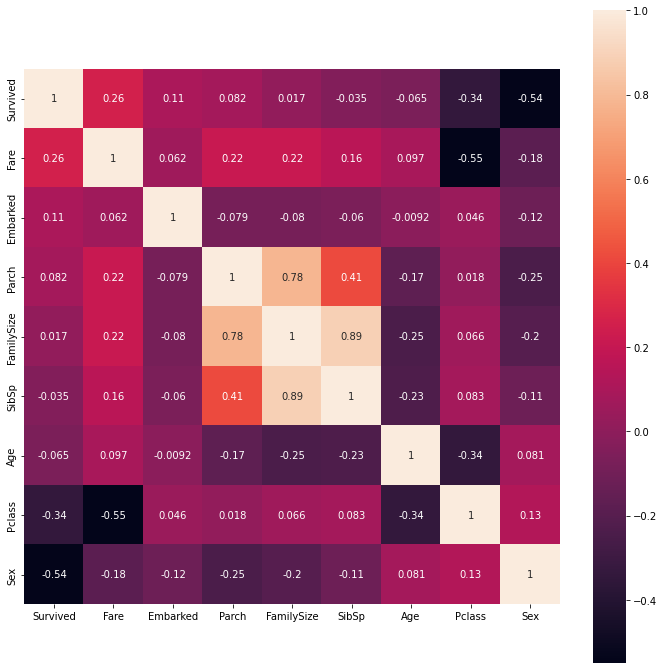

In [ ]:
# Obtain a correlation matrix of Survived with the other features in the training set
correlation_matrix = train.iloc[:, 1:].corr()  # get correlation matrix for all features except PassengerId
top_features = correlation_matrix.nlargest(correlation_matrix.shape[0], 'Survived')['Survived'].index
fig, ax = plt.subplots(figsize=(12,12))  # set the size of the following plot 
sns.heatmap(train[top_features].corr(), square=True, annot=True);

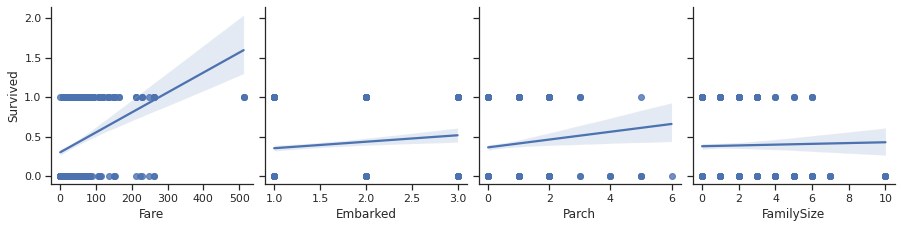

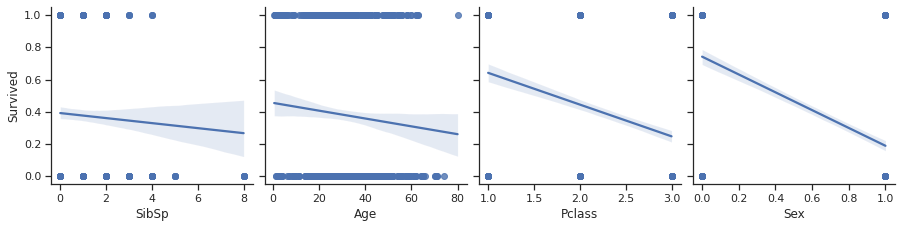

In [ ]:
# Let's see more details about the correlation of Survived with the top_features
sns.set(style='ticks')
plots_in_row = 4
rows_number = 2
for i in range(1, rows_number + 1):
    index = (i-1) * plots_in_row + 1
    sns.pairplot(data=train,
                 y_vars='Survived',
                 x_vars=top_features[index: index + plots_in_row],
                 kind="reg",
                 height = 3.2)
plt.show()

<a name="2"></a>
## 2. Logistic regression model

<a name="2-1"></a>
### 2.1. Sklearn-based LogisticRegression model implementation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def LogisticRegressionSklearn(X, y, C=1, verbose=True, **kwargs):
    """
    Implement a sklearn-based logistic regression function.

    Args:
        X (pd.DataFrame): input feature examples, size (n_examples, n_features)
        y (pd.Series): labels, size (n_examples,)
    Returns:
        model (sklearn.linear_model): sklearn-based model
        X_train (pd.DataFrame): training examples, size (0.7*n_examples, n_features)
        X_dev (pd.DataFrame): validation examples, size (0.3*n_examples, n_features)
        y_train (pd.Series): labels for training, size (0.7*n_examples,)
        y_dev (pd.Series): labels for validation, size (0.3*n_examples,)        
    """
    # Split the training data
    X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, random_state=2)

    # Create a model
    model = LogisticRegression(solver='lbfgs', C=C, **kwargs)

    # Train model
    model.fit(X_train, y_train)

    if verbose:
        # Get and display train error
        y_train_pred = model.predict(X_train)
        print("Train accuracy: {:.3f}".format(accuracy_score(y_train, y_train_pred)))

        # Get and display test error
        y_dev_pred = model.predict(X_dev)
        print("Dev accuracy : {:.3f}".format(accuracy_score(y_dev, y_dev_pred)))
    
    return model, X_train, X_dev, y_train, y_dev


In [ ]:
# Let's select features and train the model
X_sklearn = train[["Age", "Fare"]]
y_sklearn = train["Survived"]

model_sklearn, X_skl_train, X_skl_dev, y_skl_train, y_skl_dev = LogisticRegressionSklearn(X_sklearn, y_sklearn);

Train accuracy: 0.660
Dev accuracy : 0.657


<a name="2-2"></a>
### 2.2. Logistic regression from scratch

In [ ]:
# This function is just for convenience. You can study it later.

def compare_and_print(x1, y1, x1_test, y1_test, x2_norm, y2, x2_test, y2_test, model1, model2):
    """
    Compare models and print predictions.
    """    
    y_train_pred = model1.predict(x1)
    y_test_pred = model1.predict(x1_test)    
    print("Model 1, Train accuracy: {:.3f}".format(accuracy_score(y1, y_train_pred)))
    print("Model 1, Test accuracy : {:.3f}\n".format(accuracy_score(y1_test, y_test_pred)))    
    y_train_pred = model2.predict(x2_norm)
    y_test_pred = model2.predict(x2_test)    
    print("Model 2, Train accuracy: {:.3f}".format(accuracy_score(y2, y_train_pred)))
    print("Model 2, Test accuracy : {:.3f}\n".format(accuracy_score(y2_test, y_test_pred))) 
    

def print_and_plot_results(x1, y1, x1_test, y1_test, x2, x2_norm, y2, x2_test, y2_test, model1, model2):
    """
    Display and plot the results.
    """    
    # Compare weights of the trained models
    print('Model 1, Intercept: {:.3f}'.format(model1.intercept_[0]))
    print('Model 2, Intercept: {:.3f}\n'.format(model2.weights[0][0]))    
    print('Model 1, Age coef: {:.3f}'.format(model1.coef_[0][0]))
    print('Model 2, Age coef: {:.3f}\n'.format(model2.weights[1][0]))    
    print('Model 1, Fare coef: {:.3f}'.format(model1.coef_[0][1]))    
    print('Model 2, Fare coef: {:.3f}\n\n'.format(model2.weights[2][0]))

    # Display models' errors
    compare_and_print(x1, y1, x1_test, y1_test, x2_norm, y2, x2_test, y2_test, model1, model2)       
        
    # Plot the results
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    
    # Plot features for a decision boundary plot    
    ax[0].scatter(x2[y1 == 1].iloc[:, 0], x2[y1 == 1].iloc[:, 1], color='b', label='Survived')
    ax[0].scatter(x2[y1 == 0].iloc[:, 0], x2[y1 == 0].iloc[:, 1], color='r', label='Died')
    ax[0].set(title='Decision Boundary', xlabel='Age', ylabel='Fare')
    ax[0].legend()


    # Make a grid for decision boundary plot
    
    # Calculate probability grid
    x1_min_norm, x1_max_norm = x2_norm.iloc[:,0].min(), x2_norm.iloc[:,0].max()
    x2_min_norm, x2_max_norm = x2_norm.iloc[:,1].min(), x2_norm.iloc[:,1].max()   
    xx1_norm, xx2_norm = np.meshgrid(np.linspace(x1_min_norm, x1_max_norm), np.linspace(x2_min_norm, x2_max_norm))
            # np.meshgrid() returns coordinate matrices from coordinate vectors
            # np.linspace() returns evenly spaced numbers over a specified interval (the default number of samples = 50)    
    grid = np.c_[xx1_norm.ravel(), xx2_norm.ravel()]   # np.ravel() returns a contiguous flattened array
    probs = model2.predict_prob(grid).reshape(xx1_norm.shape)    
    
    # Obtain `Age` labels -- in years, not normalized
    x1_min, x1_max = x2.iloc[:,0].min(), x2.iloc[:,0].max()
    x2_min, x2_max = x2.iloc[:,1].min(), x2.iloc[:,1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))    
    
    # Plot a decision boundary
    ax[0].contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black')
            # Contours plot: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html
        
    # Plot cost function
    ax[1].set(xlabel='No. of iterations', ylabel='Cost', title='Cost Function J')
    ax[1].plot(model2.cost_history)        
        
    plt.show()  


<a name="3"></a>
### 3. YOUR TURN

Build your own logistic regression model:
+ write `sigmoid` function
+ write `loss` function
+ write `predict_prob` method
+ write `predict` method
+ complete `fit` method


In [ ]:
# Build a custom logistic regression model
class LogisticRegressionCustom():
    """
    Implement a logistic regression model from scratch using gradient descent.
    
    """
    
    def __init__(self, learning_rate=0.01, number_of_iterations=100, l2_lambda=0):
        """Initialize parameters."""
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda
        self.number_of_iterations = number_of_iterations

    def _add_intercept(self, X):
        """Add ones for intercept (theta_0) coefficient."""
        return np.c_[np.ones(X.shape[0]), X]
        
    def _sigmoid(self, z):
        """Implement the sigmoid function."""        
        # Hint: use np.exp()
        return 1 / (1 + np.exp(-z))
                
    def _cost(self, h, y):
        """Calculate loss."""        
        # Hint: use np.mean() and np.log()
        loss_basic = ((-y * np.log(h)) - ((1 - y) * np.log(( 1 - h )))).mean()
        # Hint: use np.linalg.norm() and self.l2_lambda

        loss_l2 = self.l2_lambda * (np.linalg.norm(self.weights[1:], ord=2, axis=0)**2) / (2 * y.shape[0])
        
        return loss_basic + loss_l2
    
    def predict_prob(self, X):
        """Make a prediction - probability."""
        X = self._add_intercept(X)        
        # Hint: np.dot() may be useful
        logit = X @ self.weights
        return self._sigmoid(logit)
    
    def predict(self, X, threshold=0.5):
        """Make prediction - 0 or 1."""
        # Hint: self.predict_prob() may be useful
        return self.predict_prob(X) >= threshold
        
    def fit(self, X, y):
        """Training/fitting the model."""        
        # Initialize cost history (for the next plot)
        self.cost_history = []       
        
        # Add ones for intercept (theta_0) coefficient, i.e., set x_0 = 1 for vectorization purpose
        X = self._add_intercept(X)
                        
        # Initialize weights, i.e., theta_0 and theta_1
        # Hint: use np.zeros() and x.shape
        self.weights = np.zeros((X.shape[1], 1))
        
        # Get the number of samples
        m = X.shape[0]
               
        # Train the model
        for _ in range(self.number_of_iterations):            
            # Calculate prediction/hypothesis
            # Hint: use np.dot()
            z = X @ self.weights
            # Hint: do not forget about self.sigmoid()
            h = self._sigmoid(z)
            # Update weights            
            # Hint: use np.dot
            residuals = h - y
            
            gradient = X.T.dot(residuals)
            # Hint: use self.learning_rate and gradient[0]            
            # self.weights[0] -= self.learning_rate * residuals.mean()
            # Hint: use self.learning_rate, self.l2_lambda, and gradient[1:]
            # self.weights[1:] -= (self.learning_rate / m * (gradient + self.l2_lambda * self.weights))[1:]
            self.weights -= (self.learning_rate / m) * gradient
            self.weights[1:] -= self.learning_rate * (self.l2_lambda / m) * self.weights[1:]
            # Calculate loss and cost
            # Hint: do not forget about self._cost()
            cost = self._cost(h, y)
            # Save cost changing history
            self.cost_history.append(cost)

Model 1, Intercept: -0.491
Model 2, Intercept: -0.501

Model 1, Age coef: -0.017
Model 2, Age coef: -0.214

Model 1, Fare coef: 0.015
Model 2, Fare coef: 0.699


Model 1, Train accuracy: 0.660
Model 1, Test accuracy : 0.657

Model 2, Train accuracy: 0.660
Model 2, Test accuracy : 0.657



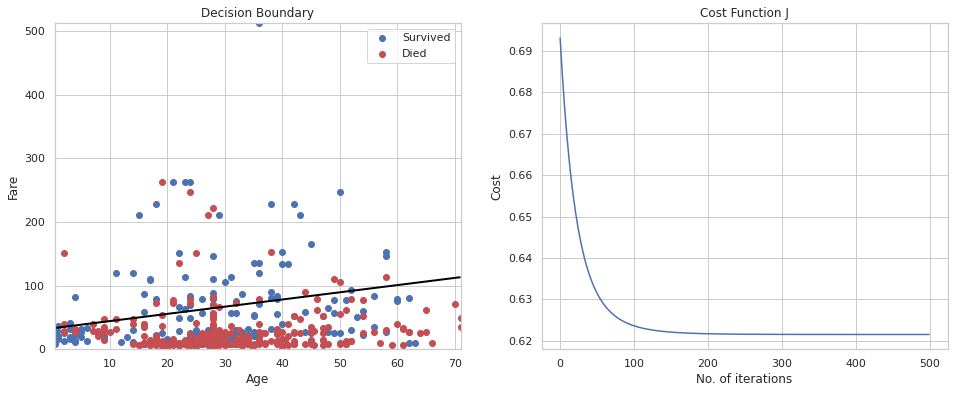

In [ ]:
# Prepare data for your model
X_custom = train[["Age", "Fare"]]
y_custom = train[["Survived"]]

# Split the data
X_cust_train, X_cust_dev, y_cust_train, y_cust_dev = train_test_split(X_custom, y_custom, test_size=0.3, random_state=2)

# Normalizing data
X_cust_train_norm = (X_cust_train - X_cust_train.mean()) / X_cust_train.std()
X_cust_dev_norm = (X_cust_dev - X_cust_train.mean()) / X_cust_train.std()

# Train the custom model
model_custom = LogisticRegressionCustom(learning_rate=0.1, number_of_iterations=500)  # let's tinkering with these parameters
model_custom.fit(X_cust_train_norm, y_cust_train)

# Print and plot the results
print_and_plot_results(X_skl_train, y_skl_train, X_skl_dev, y_skl_dev,
                       X_cust_train, X_cust_train_norm, y_cust_train, X_cust_dev_norm, y_cust_dev,
                       model_sklearn, model_custom)


Try different values of learning rate and a number of iterations:
+ learning_rate=0.01, number_of_iterations=10
+ learning_rate=0.01, number_of_iterations=100
+ learning_rate=0.01, number_of_iterations=500
+ learning_rate=0.01, number_of_iterations=5000
+ learning_rate=0.1, number_of_iterations=500
+ learning_rate=1, number_of_iterations=50
+ learning_rate=10, number_of_iterations=50   **==>  Do you see something interesting? Think about the reason for it.**
+ learning_rate=20, number_of_iterations=50
+ learning_rate=100, number_of_iterations=50   

In [ ]:
from tqdm import tqdm

attempt = {.001 : [10, 100, 500, 5_000],
           .1 : [500],
           1 : [50],
           10 : [50],
           20 : [50],
           100 : [50]}

In [ ]:
models = []
for learning_rate, itarations_list in tqdm(attempt.items()):
    for itr in itarations_list:
        print(learning_rate, itr)
        model = LogisticRegressionCustom(learning_rate, itr)
        model.fit(X_cust_train_norm, y_cust_train)
        models.append(model)

  0%|          | 0/6 [00:00<?, ?it/s]

0.001 10
0.001 100
0.001 500
0.001 5000


 17%|█▋        | 1/6 [00:13<01:07, 13.48s/it]

0.1 500


 50%|█████     | 3/6 [00:14<00:10,  3.45s/it]

1 50
10 50


 83%|████████▎ | 5/6 [00:15<00:01,  1.41s/it]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


20 50
100 50


100%|██████████| 6/6 [00:15<00:00,  2.53s/it]


learning_rate = 0.001 
 number_of_iterations = 10
Model 1, Intercept: -0.491
Model 2, Intercept: -0.001

Model 1, Age coef: -0.017
Model 2, Age coef: -0.000

Model 1, Fare coef: 0.015
Model 2, Fare coef: 0.001


Model 1, Train accuracy: 0.660
Model 1, Test accuracy : 0.657

Model 2, Train accuracy: 0.663
Model 2, Test accuracy : 0.642



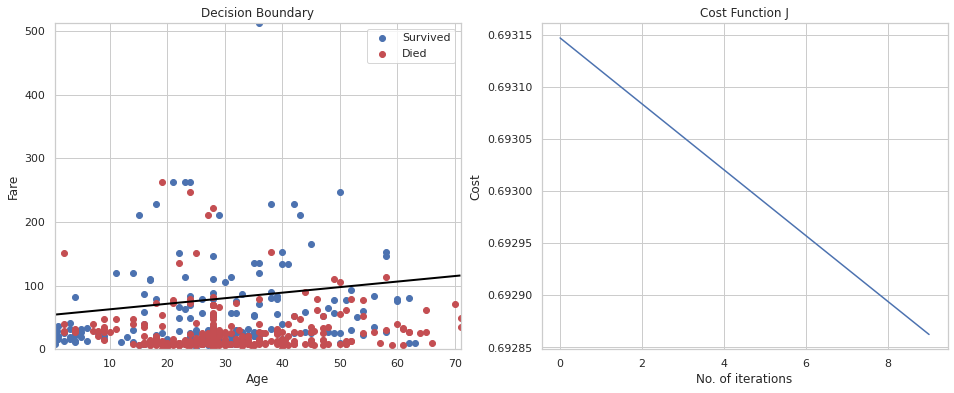

learning_rate = 0.001 
 number_of_iterations = 100
Model 1, Intercept: -0.491
Model 2, Intercept: -0.012

Model 1, Age coef: -0.017
Model 2, Age coef: -0.003

Model 1, Fare coef: 0.015
Model 2, Fare coef: 0.012


Model 1, Train accuracy: 0.660
Model 1, Test accuracy : 0.657

Model 2, Train accuracy: 0.663
Model 2, Test accuracy : 0.642



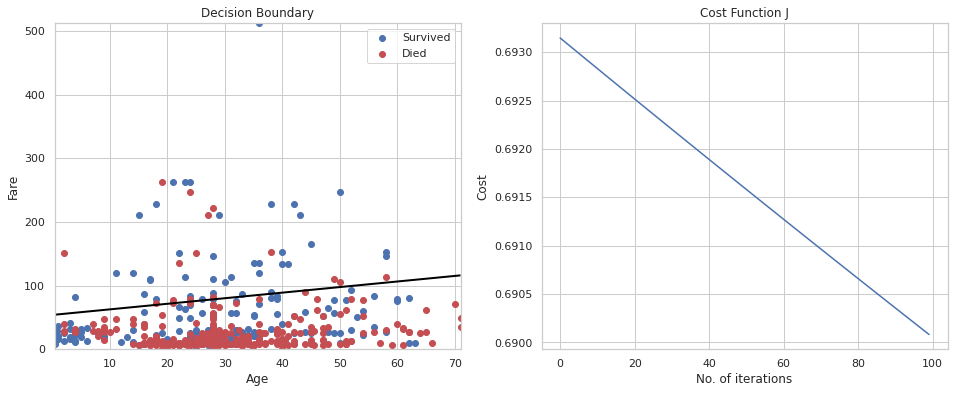

learning_rate = 0.001 
 number_of_iterations = 500
Model 1, Intercept: -0.491
Model 2, Intercept: -0.058

Model 1, Age coef: -0.017
Model 2, Age coef: -0.014

Model 1, Fare coef: 0.015
Model 2, Fare coef: 0.058


Model 1, Train accuracy: 0.660
Model 1, Test accuracy : 0.657

Model 2, Train accuracy: 0.663
Model 2, Test accuracy : 0.642



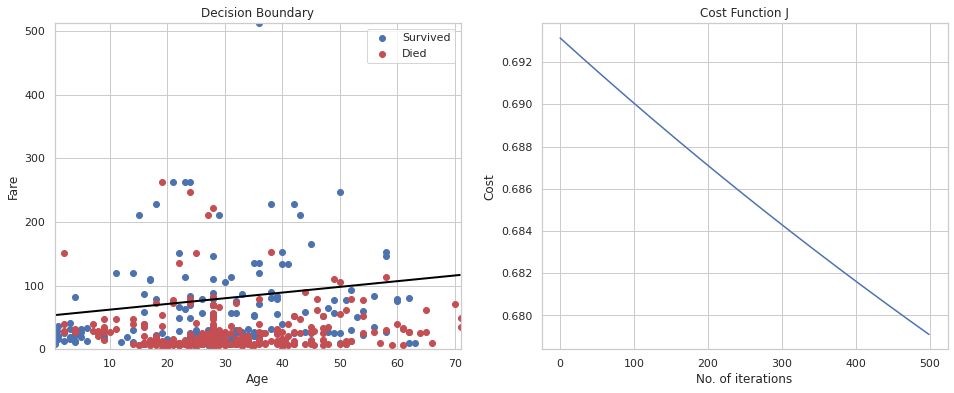

learning_rate = 0.001 
 number_of_iterations = 5000
Model 1, Intercept: -0.491
Model 2, Intercept: -0.356

Model 1, Age coef: -0.017
Model 2, Age coef: -0.105

Model 1, Fare coef: 0.015
Model 2, Fare coef: 0.376


Model 1, Train accuracy: 0.660
Model 1, Test accuracy : 0.657

Model 2, Train accuracy: 0.661
Model 2, Test accuracy : 0.649



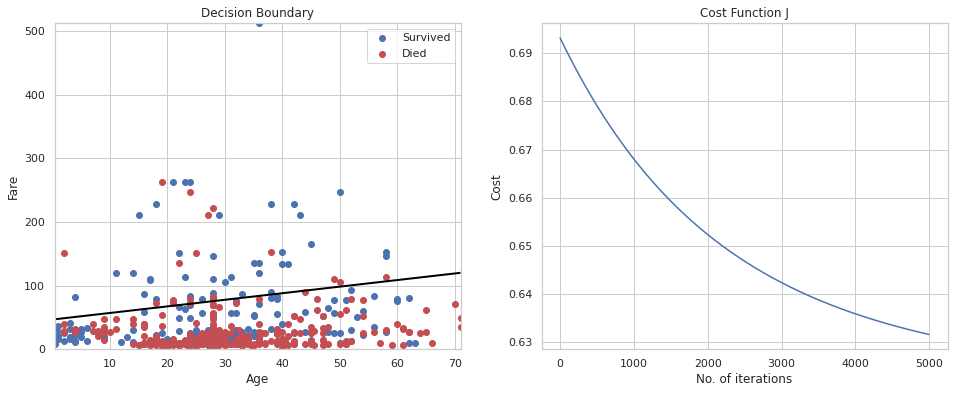

learning_rate = 0.1 
 number_of_iterations = 500
Model 1, Intercept: -0.491
Model 2, Intercept: -0.501

Model 1, Age coef: -0.017
Model 2, Age coef: -0.214

Model 1, Fare coef: 0.015
Model 2, Fare coef: 0.699


Model 1, Train accuracy: 0.660
Model 1, Test accuracy : 0.657

Model 2, Train accuracy: 0.660
Model 2, Test accuracy : 0.657



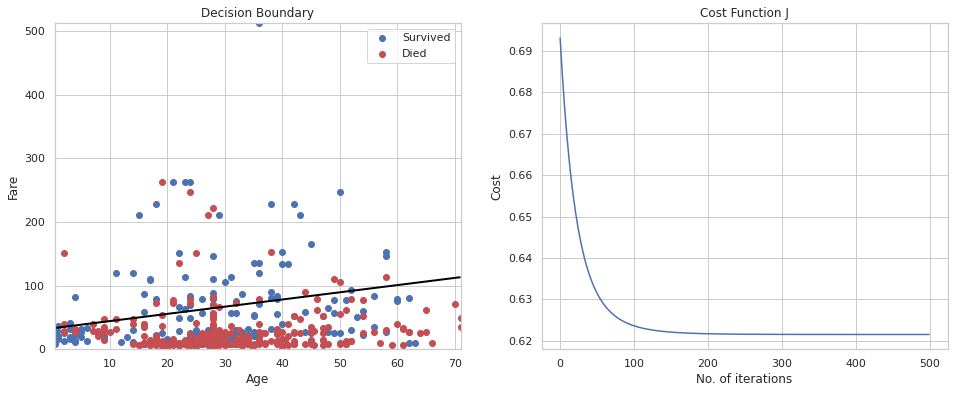

learning_rate = 1 
 number_of_iterations = 50
Model 1, Intercept: -0.491
Model 2, Intercept: -0.501

Model 1, Age coef: -0.017
Model 2, Age coef: -0.214

Model 1, Fare coef: 0.015
Model 2, Fare coef: 0.700


Model 1, Train accuracy: 0.660
Model 1, Test accuracy : 0.657

Model 2, Train accuracy: 0.660
Model 2, Test accuracy : 0.657



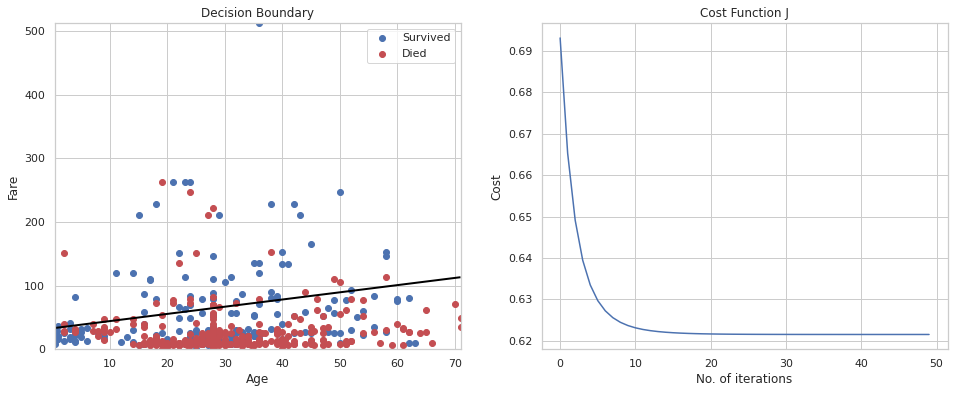

learning_rate = 10 
 number_of_iterations = 50
Model 1, Intercept: -0.491
Model 2, Intercept: 0.074

Model 1, Age coef: -0.017
Model 2, Age coef: -0.802

Model 1, Fare coef: 0.015
Model 2, Fare coef: 0.544


Model 1, Train accuracy: 0.660
Model 1, Test accuracy : 0.657

Model 2, Train accuracy: 0.562
Model 2, Test accuracy : 0.597



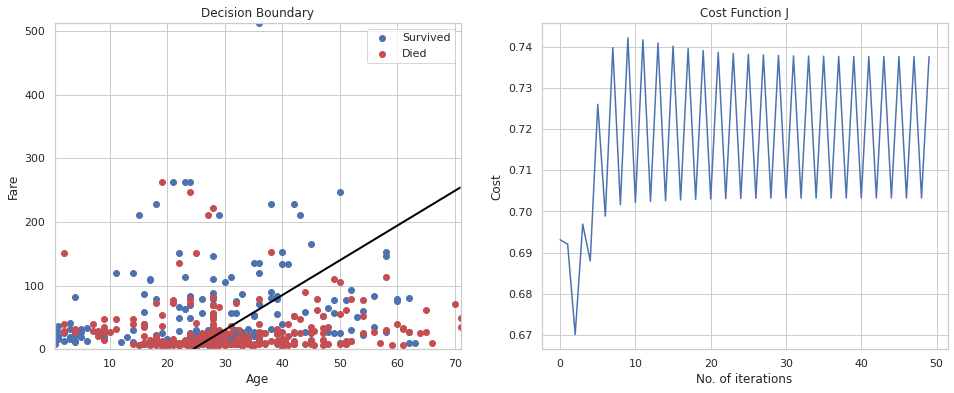

learning_rate = 20 
 number_of_iterations = 50
Model 1, Intercept: -0.491
Model 2, Intercept: 0.879

Model 1, Age coef: -0.017
Model 2, Age coef: -2.115

Model 1, Fare coef: 0.015
Model 2, Fare coef: 0.587


Model 1, Train accuracy: 0.660
Model 1, Test accuracy : 0.657

Model 2, Train accuracy: 0.459
Model 2, Test accuracy : 0.511



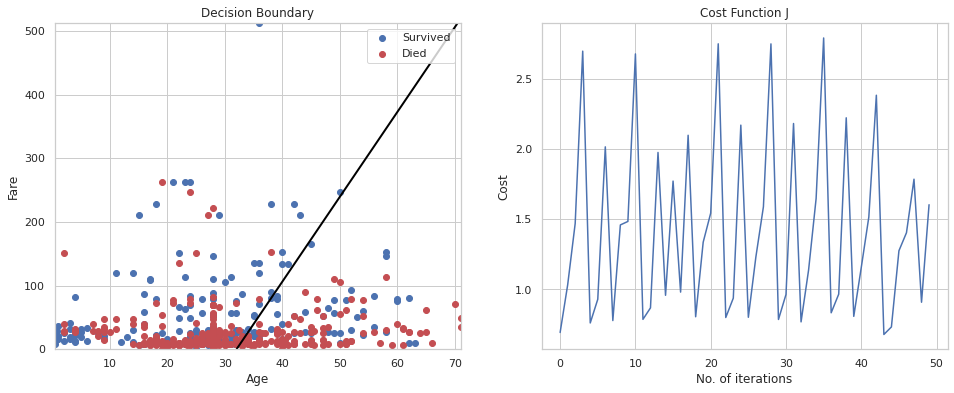

learning_rate = 100 
 number_of_iterations = 50
Model 1, Intercept: -0.491
Model 2, Intercept: 14.743

Model 1, Age coef: -0.017
Model 2, Age coef: -10.431

Model 1, Fare coef: 0.015
Model 2, Fare coef: -3.486


Model 1, Train accuracy: 0.660
Model 1, Test accuracy : 0.657

Model 2, Train accuracy: 0.384
Model 2, Test accuracy : 0.414



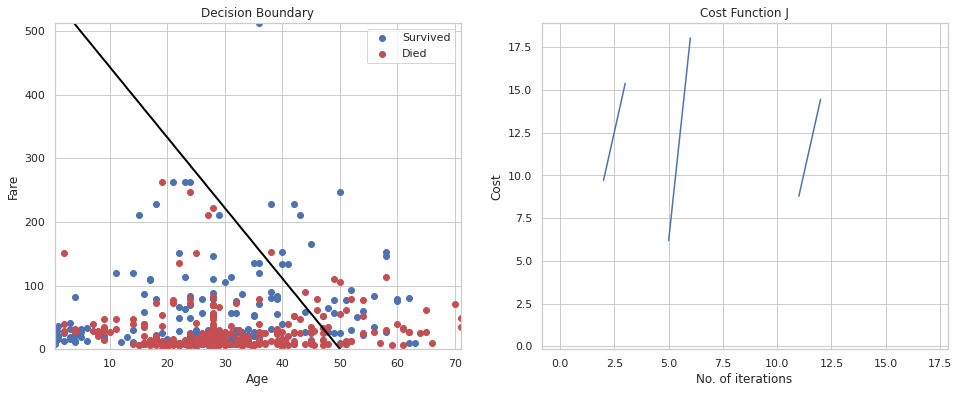

In [ ]:
for m in models:
    print(f"learning_rate = {m.learning_rate} \n number_of_iterations = {m.number_of_iterations}")
    print_and_plot_results(X_skl_train, y_skl_train, X_skl_dev, y_skl_dev,
                       X_cust_train, X_cust_train_norm, y_cust_train, X_cust_dev_norm, y_cust_dev,
                       model_sklearn, m)


<a name="3-1"></a>
### 3.1. Try to get a test accuracy of at least 0.780 using the minimum number of features

In [ ]:
train.corr()[['Survived']].query("Survived > 0.1 or Survived <-0.1")[:-1]

,Survived
Survived,1.000000
Pclass,-0.338481
Sex,-0.543351
Fare,0.257307


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Select features   
X_select = train[["Age", "Fare", 'Pclass', 'Sex']]

norm_x = StandardScaler()
X_train_norm = norm_x.fit_transform(X_select)

y_select = train["Survived"]

LogisticRegressionSklearn(X_train_norm, y_select);

Train accuracy: 0.807
Dev accuracy : 0.780


<a name="3-2"></a>
### 3.2. Regularization

#### Model 1 - Sklearn model

Sklearn's LogisticRegression has built-in (always active) regularization:
$$\min_{w, c} \frac{1}{2}w^T w + \color{red}{C} \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) .$$
where C is an inverse of regularization strength (must be a positive float; default = 1.0). Like in support vector machines (later in this course), smaller values specify stronger regularization. Note that, in this notation, it’s assumed that the observation $y_i$ takes values in the set ${-1, 1}$ at trial $i$.

You can also use `penalty` parameter of the scikit-learn *LogisticRegression()* to use $L_1$ regularization: just set `penalty='l1'` (default `penalty` is `'l2'`).

#### Model 2 - Custom model

In our custom model we implemented regularization via lambda:

$$J(\theta)=-\frac{1}{m}\sum_{i=1}^m y^{(i)} \cdot log(h_\theta(x^{(i)}))+(1-y^{(i)})⋅log⁡(1-h_\theta(x^{(i)})) + \frac{\color{red}{\lambda}}{2m} \sum_{j=1}^n \theta_j^2$$


#### YOUR TASK:

Changing `C` for `model1` and `l2_lambda` for `model2`, try to obtain the test accuracy **0.73+** for the first model and **0.77+** for the second one.

In [ ]:
# Let's add too much capacity to the model
train["Age2"] = train["Age"]**2
train["Age3"] = train["Age"]**3
features = ["Sex", "Pclass", "Age", "Age2", "Age3"]

# Model 1 (Sklearn)
X_sklearn = train[features]
y_sklearn = train["Survived"]

model_sklearn, X_skl_train, X_skl_dev, y_skl_train, y_skl_dev = LogisticRegressionSklearn(X_sklearn, y_sklearn,
                                                                                          C=0.075,                     # find appropriate C value
                                                                                          verbose=False)

# Model 2 (Custom)
X_custom = train[features]
y_custom = train[["Survived"]]

# Split the data
X_cust_train, X_cust_dev, y_cust_train, y_cust_dev = train_test_split(X_custom, y_custom, test_size=0.3, random_state=2)

# Normalize data
X_cust_train_norm = (X_cust_train - X_cust_train.mean()) / X_cust_train.std()
X_cust_dev_norm = (X_cust_dev - X_cust_train.mean()) / X_cust_train.std()

# Train the custom model
model_custom = LogisticRegressionCustom(learning_rate=0.1, number_of_iterations=100, l2_lambda=9)  # find appropriate l2_lambda
model_custom.fit(X_cust_train_norm, y_cust_train)

# Print and plot the results
compare_and_print(X_skl_train, y_skl_train, X_skl_dev, y_skl_dev,
                  X_cust_train_norm, y_cust_train, X_cust_dev_norm, y_cust_dev,
                  model_sklearn, model_custom)


Model 1, Train accuracy: 0.764
Model 1, Test accuracy : 0.735

Model 2, Train accuracy: 0.806
Model 2, Test accuracy : 0.772

